Nama : Rizan Fauzi Rahman<br>
NIM : 211351129<br>
Kelas : Pagi B

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizanfauzirahman","key":"1ca4fa3b6a5d56249fac113c0011abdb"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d deepcontractor/mcdonalds-india-menu-nutrition-facts --force

  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 10.0MB/s]


In [4]:
!mkdir mcdonalds-india-menu-nutrition-facts
!unzip mcdonalds-india-menu-nutrition-facts.zip -d mcdonalds-india-menu-nutrition-facts
!ls mcdonalds-india-menu-nutrition-facts

Archive:  mcdonalds-india-menu-nutrition-facts.zip
  inflating: mcdonalds-india-menu-nutrition-facts/India_Menu.csv  
India_Menu.csv


# import library yang digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Data Discovery

In [6]:
df = pd.read_csv('/content/mcdonalds-india-menu-nutrition-facts/India_Menu.csv')

In [7]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [9]:
df.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [10]:
df.describe()

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
mean,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000
max,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


# EDA (minimal 5)

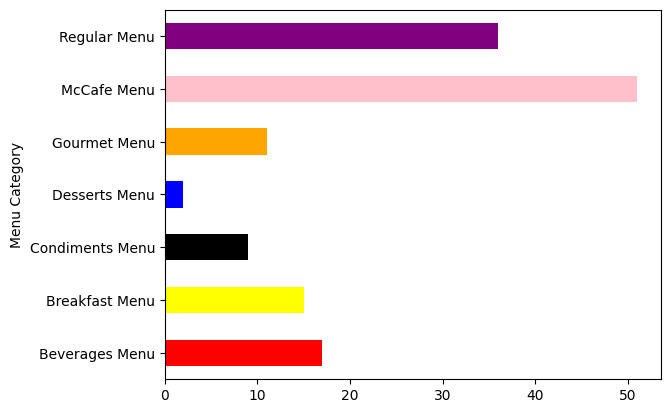

In [11]:
c = ['red', 'yellow', 'black', 'blue', 'orange','pink','purple']
df.groupby('Menu Category')['Menu Category'].count().plot.barh(color=c);

<ipython-input-12-efd7b39df974>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(['Menu Category', 'Menu Items'], axis=1).corr() # We already examined SalePrice correlations


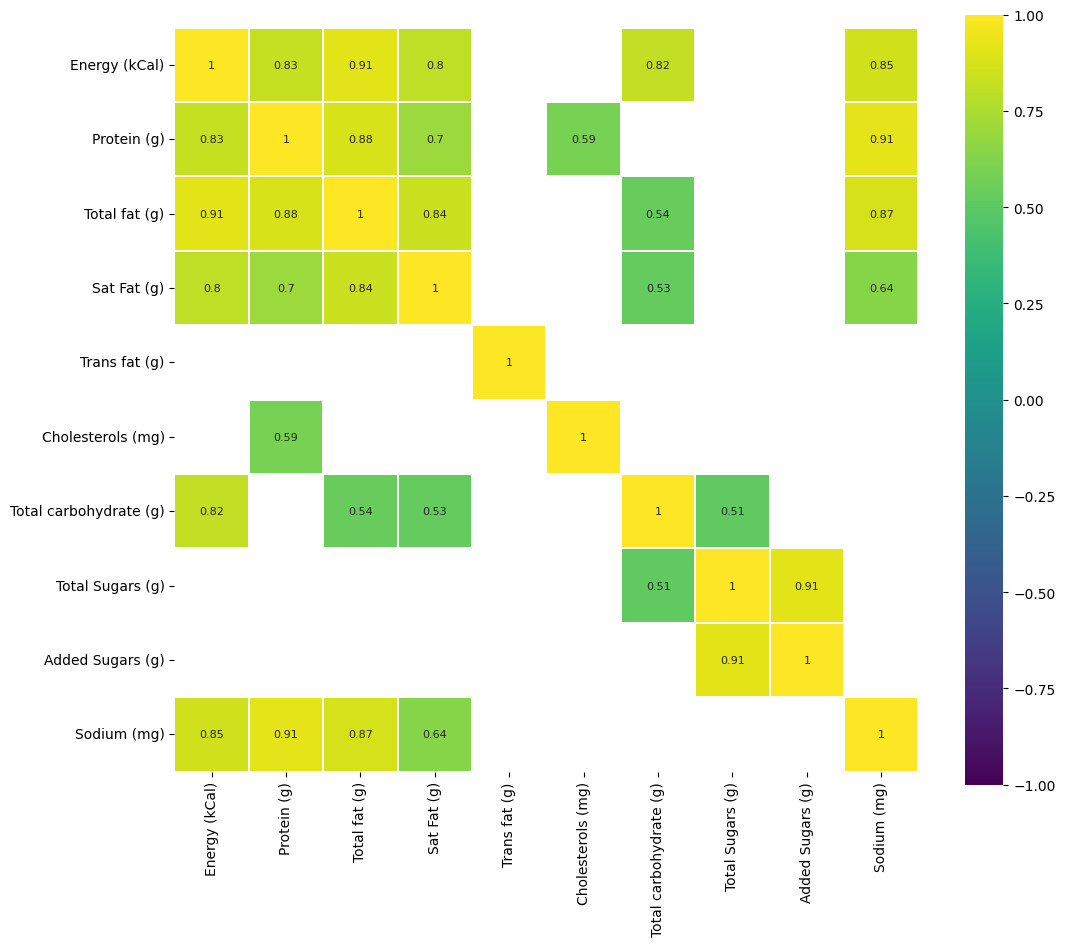

In [12]:
corr = df.drop(['Menu Category', 'Menu Items'], axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

Text(0.5, 1.0, 'Total fat mark')

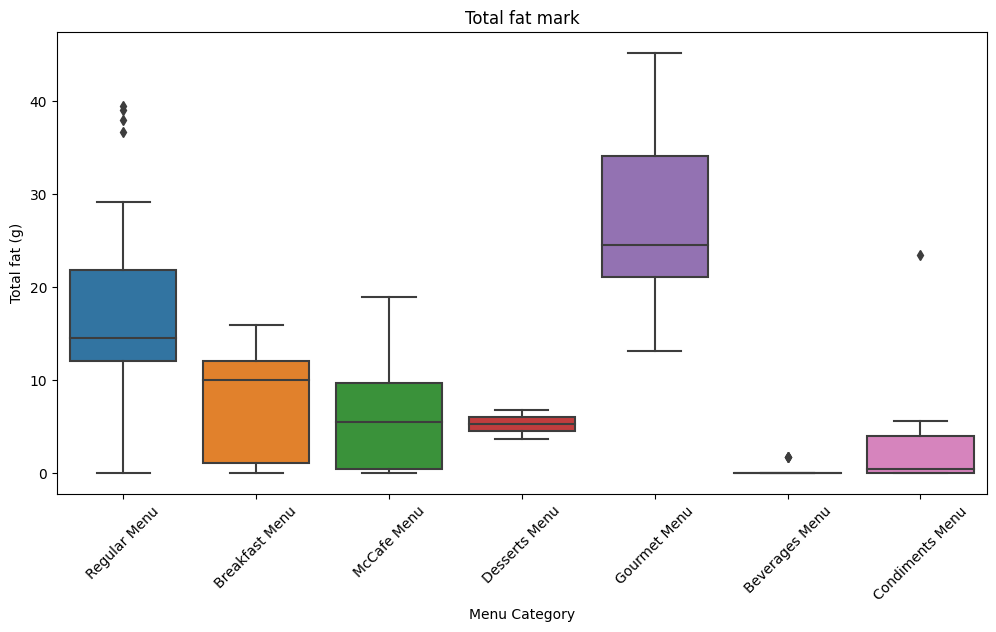

In [13]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Menu Category', y='Total fat (g)', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Total fat mark')

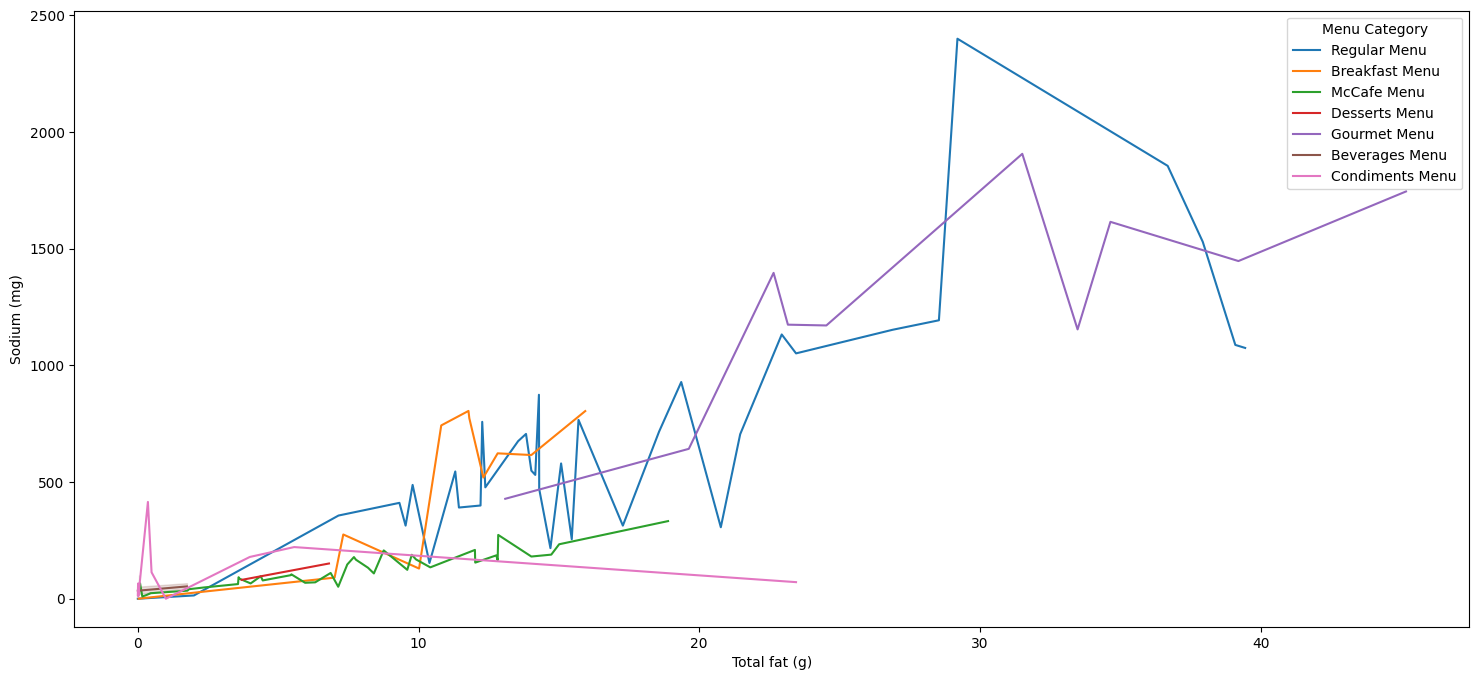

In [14]:
plt.figure(figsize=(18,8))
plt5 = sns.lineplot(x="Total fat (g)", data=df,y="Sodium (mg)",hue="Menu Category")
plt.show()

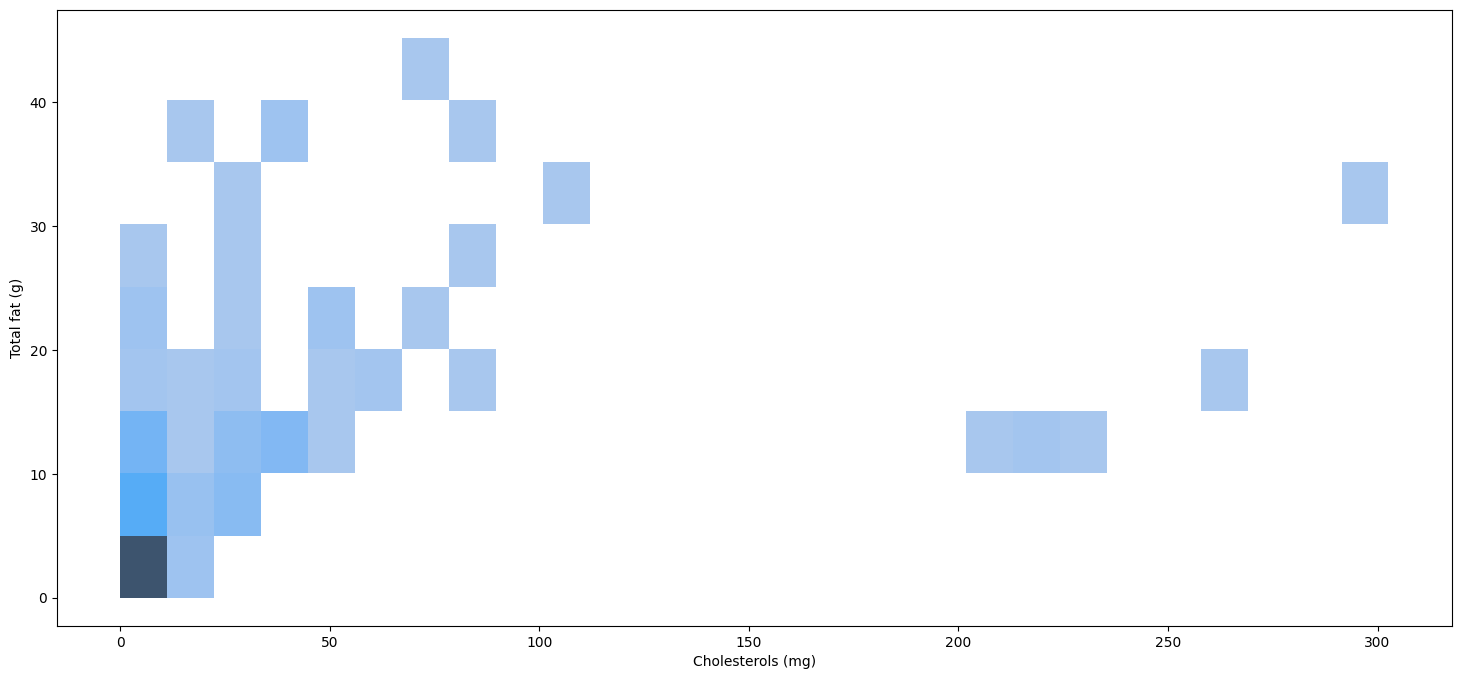

In [15]:
plt.figure(figsize=(18,8))
plt4 = sns.histplot(x="Cholesterols (mg)", y="Total fat (g)", data=df)
plt.show()

# Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Total Sugars (g)']=le.fit_transform(df['Total Sugars (g)'])

In [17]:
le=LabelEncoder()
df['Total Sugars (g)']=le.fit_transform(df['Total Sugars (g)'])

In [18]:
X = df.drop(['Menu Category', 'Menu Items', 'Per Serve Size', 'Energy (kCal)', 'Sat Fat (g)', 'Trans fat (g)', 'Total carbohydrate (g)', 'Added Sugars (g)', 'Sodium (mg)'], axis=1)

In [19]:
print(X)

     Protein (g)  Total fat (g)  Cholesterols (mg)  Total Sugars (g)
0          10.24          13.83               2.49                51
1           8.50          11.31               1.47                45
2          20.29          39.45              21.85                52
3          20.96          39.10              40.93                34
4          15.30          23.45              25.24                50
..           ...            ...                ...               ...
136         0.08          23.45               0.08                22
137         0.00           0.00               0.30                69
138         3.06           3.99              13.43                 9
139         1.47           1.00               2.00                26
140         0.65           0.02               0.01                73

[141 rows x 4 columns]


# modeling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

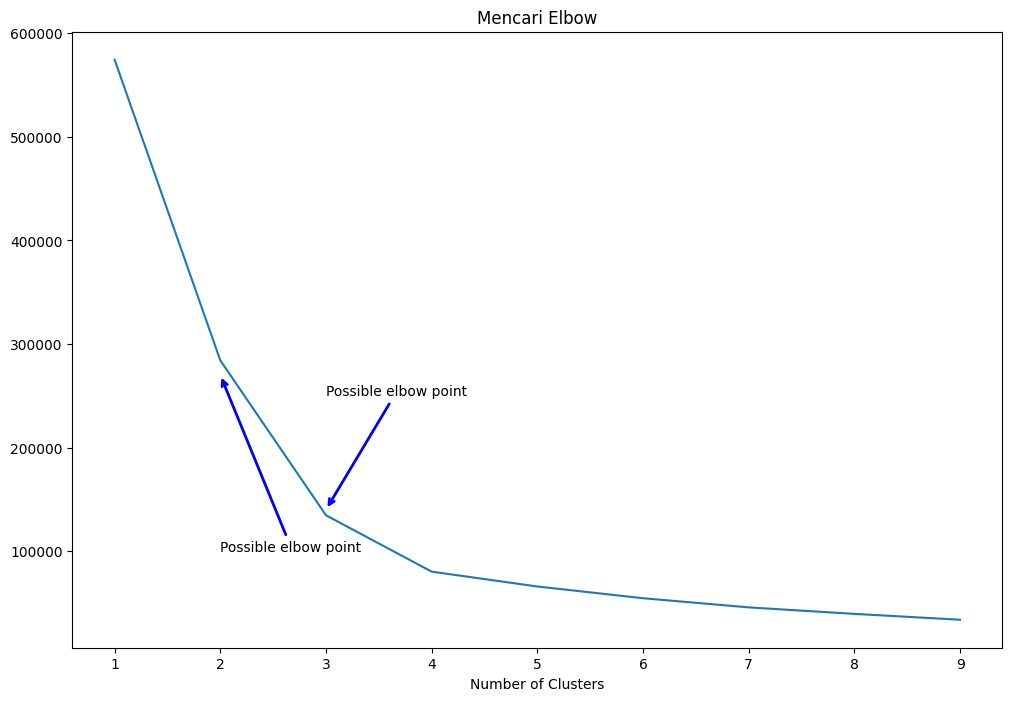

In [28]:
clusters = []
for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('Number of Clusters')

ax.annotate('Possible elbow point', xy=(2, 270000), xytext=(2, 100000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible elbow point', xy=(3, 140000), xytext=(3, 250000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [31]:
n_clust = 3
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


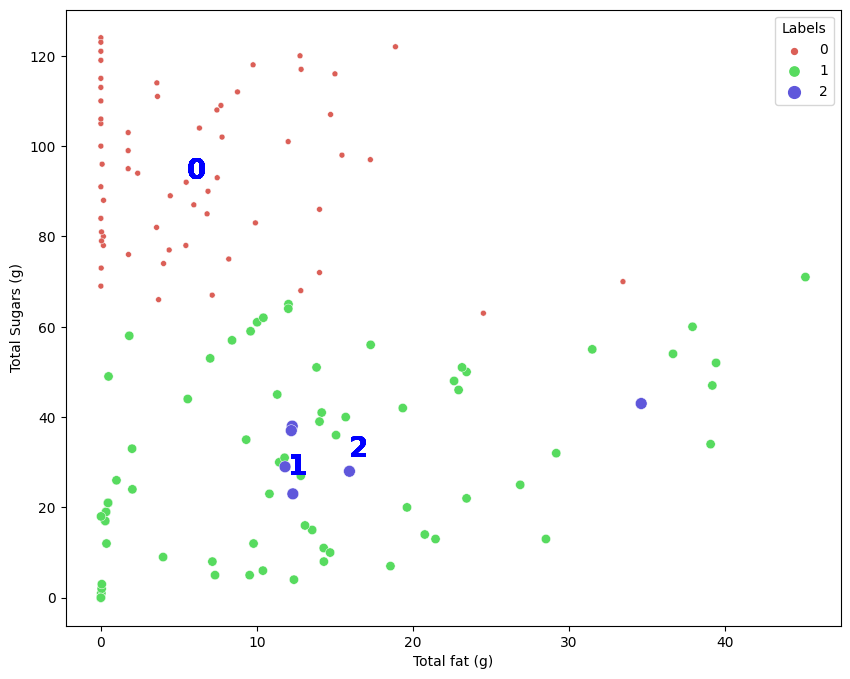

In [32]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='Total fat (g)', y='Total Sugars (g)', hue='Labels', size='Labels', markers=True, palette=sns.color_palette('hls', n_colors=n_clust), data=X)

for label in X['Labels']:
    plt.annotate(label,
                 (X[X['Labels'] == label]['Total fat (g)'].mean(),
                  X[X['Labels'] == label]['Total Sugars (g)'].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='blue')

plt.show()

In [33]:
print(X)

     Protein (g)  Total fat (g)  Cholesterols (mg)  Total Sugars (g)  Labels
0          10.24          13.83               2.49                51       1
1           8.50          11.31               1.47                45       1
2          20.29          39.45              21.85                52       1
3          20.96          39.10              40.93                34       1
4          15.30          23.45              25.24                50       1
..           ...            ...                ...               ...     ...
136         0.08          23.45               0.08                22       1
137         0.00           0.00               0.30                69       0
138         3.06           3.99              13.43                 9       1
139         1.47           1.00               2.00                26       1
140         0.65           0.02               0.01                73       0

[141 rows x 5 columns]


In [34]:
# Assume you have performed clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.49400326436280106


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
X.to_excel("Output_Cluster.xlsx")

# save model (pickle)

In [25]:
import pickle

with open("model.pkl", "wb") as mod:
    pickle.dump(kmean, mod)